In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd


In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# inspect tables 
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
engine.execute('SELECT * FROM measurement LIMIT 2').fetchall()


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0)]

In [12]:
m_dic  = session.query(Measurement).first()
#print('the dicionary print result of Measurement is', m_dic.__dict__ )
m_dic.__dict__ 

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0xb8dd698e80>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [13]:
# inspect tables 
columnz = inspector.get_columns('station')
for d in columnz:
    print(d['name'], d["type"])
    
engine.execute('SELECT * FROM station LIMIT 2').fetchall()

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)]

In [14]:
s_dic  = session.query(Station).first()
s_dic.__dict__ 

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0xb8dd6bf320>,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716}

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
#Earliest Date -- ORDER BY ASCEND--- GRAB FIRST RECORD 

first_measure_date = session.query(Measurement.date).order_by(Measurement.date).first()
print(f' the first date in the Measurement table is : {first_measure_date}') 
# Latest Date -- ORDER BY DESC--- GRAB FIRST RECORD 
last_measure_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f' the last date in the Measurement table is : {last_measure_date}')
# the earliest date = '2010-01-01'
# the last date = '2017-08-23' 
# just double checking year ago is 2016-08-23
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# do this command below to get clean vertical print of just 5 results 
#------------------------------------------
# session.query(Measurement.date, Measurement.prcp).\
#     filter(Measurement.date > '2016-08-23').\
#     order_by(Measurement.date).limit(5).all()
#------------------------------------------

#Find all of the dates great than 2016-08-23
data_extract = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()
#print(f'This is the data we are extracting for Measurement date & Percipitation :prcp {data_extract}')

 the first date in the Measurement table is : ('2010-01-01',)
 the last date in the Measurement table is : ('2017-08-23',)
Query Date:  2016-08-23


In [16]:
# CONVERT TO DATA FRAME WITH JUST DATE AND PRECIPITAION DATA - SORTED BY DATE AND INDEX SET TO DATE COLUMN
df1 = pd.DataFrame(data_extract)
#df1 = df1.dropna(how="any")
#df1 = df1.sort_values("date", ascending = False)
df1 = df1.set_index("date")  
df1 = df1.sort_index( axis =0,  ascending =True)
df1.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


C:\Users\brandon\Miniconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 360x1440 with 0 Axes>

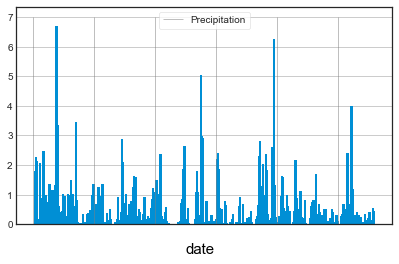

In [18]:
### Precipitation Analysis

# * Design a query to retrieve the last 12 months of precipitation data.
# * Select only the `date` and `prcp` values.
# * Load the query results into a Pandas DataFrame and set the index to the date column.
# * Sort the DataFrame values by `date`.
# * Plot the results using the DataFrame `plot` method.
#x_axis = np.arange(len(df1))
#x_axis = np.arange(0,1,.01)
import matplotlib.pyplot as plt

with plt.style.context(('seaborn-white')): 

    plt.figure(figsize=(5,20))
    df1.plot.bar ( y = 'prcp', align='edge',  width = 15)
    #plt.xlim(-0.25, len(x_axis))
    #plt.subplots(constrained_layout=True)
    #plt.tight_layout()
    ax1 = plt.axes()
    x_axis = ax1.axes.get_xaxis()
    x_axis.set_visible(False)
    ax1.grid(True) 
    plt.grid( zorder = 2)
    #plt.xlim(0,3)
    #plt.axis('normal')
    #plt.xscale('linear')
    x =(0,400, 800,1200,1600,2000)
    plt.vlines( x, ymin =0, ymax = 7, colors='gray', linewidths=1,  linestyles='solid',  alpha= .5 )#, zorder = -2)
    plt.autoscale()
    plt.xlabel("date")
    plt.text(1000, -1, 'date', color = 'black', fontsize = 15)
    plt.legend( ['Precipitation'] ,fontsize = 10,loc='upper center', frameon = True )
    plt.savefig("Precip_BS.png", dpi=192, bbox_inches='tight') 
    plt.show()
    #plt.close('all')
#   ![precipitation](Images/precipitation.png)
# * Use Pandas to print the summary statistics for the precipitation data.
# Perform a query to retrieve the data and precipitation scores


In [ ]:


# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [17]:
df1.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


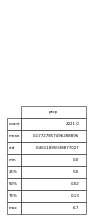

In [23]:

import matplotlib.pyplot as plt
from pandas.plotting import table

desc1 = df1.describe()
#create a subplot without frame
plot = plt.subplot(255,  frame_on=False)
plt.autoscale()
#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 
#create the table plot and position it in the upper left corner
table(plot, desc1)
#save the plot as a png file
plt.savefig('desc_plot.png' ,dpi=192, bbox_inches='tight') 
# see my image file - I'm not sure why its so small below ?

In [26]:
# Design a query to show how many stations are available in this dataset?
s_dic  = session.query(Station).first()
#print( s_dic.__dict__ )
# first_measure_date = session.query(Measurement.date).order_by(Measurement.date).first()
# print(f' the first date in the Measurement table is : {first_measure_date}') 
#session.query(Station.id).filter_by(year="2017").count()
print ('the number of stations by counting their ids are :', session.query(Station.id).count())
print ('the number of stations by counting the stations are :', session.query(Station.station).count())

#print ('the number of stations by counting their ids are :', session.query(Measurement.id).count())
#print ('the number of stations by counting the measurement table stations are :', session.query(Measurement.station).count())


the number of stations by counting their ids are : 9
the number of stations by counting the stations are : 9


In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
from sqlalchemy import funcfilter
from sqlalchemy import distinct, func
import operator
from operator import itemgetter, attrgetter

sess = session.query(Measurement.station, func.count(Measurement.station).label('counts')).\
                group_by(Measurement.station).order_by(Measurement.station.desc()).all()

# I COULD NOT FIND ADEQUATE INTERNET EXAMPLES OR ALCHEMY DOCS TO SORT BY MY RESULT GROUP BY COUNTS
# SOME DOCS SUGGESTED YOU CAN SORT BY THE LABEL YOU GIVE THE COUNT RESULT AND PLUG INTO THE DESC()
# AS A SORT PARAMETER BUT NO GO SO i USED PYTHON TABLE/LIST SORT FEATURE BELOW 

sess =sorted(sess, key=operator.itemgetter(1), reverse=True) # sort by col  2 , largest to smallest
most_active_station = sess[0][0]

print(f' The most active station is : {most_active_station}')

for i in sess:
    print(i)


 The most active station is : USC00519281
('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [29]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
high_temp = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station ).order_by(Measurement.tobs.desc()).first()
print(f' The Highest temp for station {most_active_station} was : {high_temp[0]}')
    #filter(Measurement.station == 'USC00519281').filter(Measurement.tobs > 80).all()
low_temp = session.query(Measurement.tobs).\
    filter(Measurement.station ==  most_active_station ).order_by(Measurement.tobs).first()
print(f' The  Lowest temp for station {most_active_station} was : {low_temp[0]} ')

avg_temp = session.query(func.avg(Measurement.tobs)).\
     filter(Measurement.station ==  most_active_station ).all()
print(f' The Average temp for station {most_active_station} was : {round((avg_temp[0][0]),2)}')

# I DID THE FIRST METHOD ABOVE FIRST AND PREFER USING THE FUNC FOR HIGH AND MIN 

sel = [ 
        func.avg(Measurement.tobs),
        func.min(Measurement.tobs),
        func.max(Measurement.tobs)
      ] 
totals = session.query(*sel).\
   filter(Measurement.station == most_active_station).all()
print()
print( 'For Station USC00519281: the Highest temp was  : ' ,totals[0][2] , '|   the lowest temp was : ' ,totals[0][1], '|  the average temp was : ' ,round((totals[0][0]),2) )


 The Highest temp for station USC00519281 was : 85.0
 The  Lowest temp for station USC00519281 was : 54.0 
 The Average temp for station USC00519281 was : 71.66

For Station USC00519281: the Highest temp was  :  85.0 |   the lowest temp was :  54.0 |  the average temp was :  71.66


In [30]:
sel1 = [ 
        #func.min(Measurement.date),
        func.max(Measurement.date)
      ] 
end_date = session.query(*sel1).\
       filter(Measurement.station == 'USC00519281').\
       filter(Measurement.date).all()
print (f'the max date for this query is {end_date}') 

start_date = dt.date(2017, 8, 18) - dt.timedelta(days=365)
print("start_date : ", start_date )

#--check 5 results of the dates great than 2016-08-18 for station  'USC00519281'
print ( session.query( Measurement.station,Measurement.date, Measurement.tobs).\
        filter(Measurement.date >=  start_date, Measurement.station == 'USC00519281').\
        order_by(Measurement.date).limit(5).all())

#--GET ALL results of the dates great than 2016-08-18 for station  'USC00519281'
data_extract1 = session.query( Measurement.station,Measurement.date, Measurement.tobs).\
    filter(Measurement.date >=  start_date, Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()

the max date for this query is [('2017-08-18',)]
start_date :  2016-08-18
[('USC00519281', '2016-08-18', 80.0), ('USC00519281', '2016-08-19', 79.0), ('USC00519281', '2016-08-20', 81.0), ('USC00519281', '2016-08-21', 79.0), ('USC00519281', '2016-08-22', 78.0)]


In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df2 = pd.DataFrame(data_extract1, columns=['Station', 'Date', 'Temperature' ] )
df2.head()

,Station,Date,Temperature
0,USC00519281,2016-08-18,80.0
1,USC00519281,2016-08-19,79.0
2,USC00519281,2016-08-20,81.0
3,USC00519281,2016-08-21,79.0
4,USC00519281,2016-08-22,78.0


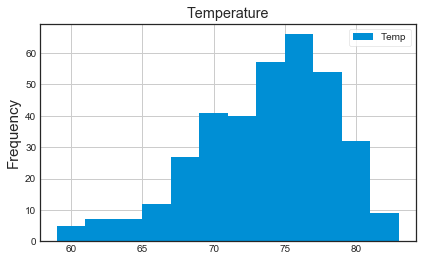

In [32]:
with plt.style.context(('seaborn-white')): 
    df2.hist(bins=12)
    plt.legend( ['Temp'] ,fontsize = 10,loc='upper right', frameon = True )
    plt.ylabel('Frequency', fontsize = 15)
    plt.savefig("Temp_Histo_BS.png", dpi=192, bbox_inches='tight') 
    plt.show()

In [41]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [44]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# the sample notebook result was : 62.0 | 68.36 |  74.0

# THESE INSTRUCTIONS ARE WACK IN ORDER TO GET THE RESULT GIVEN
# SINCE THERE WAS A LEAP YEAR IN 2012 THE INSTRUCTIONS SHOULD SAY FOR 
# AN 7 DAY PERIOD STARTING FROM THE START DATE GIVEN A YEAR AGO GET RESULTS
# THEN WE GET THIS RESULT - IF WE LITERALLY FOLLOW INSTUCTIONS JUST PLUGIN
# SAME DATES FOR A YEAR AGO WE GET SOMETHING DIFFERENT 
print('tried many more dates tried to match starter notebook, i find these instructions confusing')
print()
print('to get the notebook given solution - plug these dates: 2011-02-27 to 2011-03-05 ')
print('Min Temp |  Average Temp  | Max Temp')
print(calc_temps( '2011-02-27', '2011-03-05'))
print()
print('reading the instructions literally - plug these dates: 2011-02-28 to 2011-03-05 ')
print('Min Temp |  Average Temp  | Max Temp')
print(calc_temps( '2011-02-28', '2011-03-06'))
print()
print('Min Temp |  Average Temp  | Max Temp |  for: 2017-02-28, 2017-03-05')
print(calc_temps( '2017-02-28', '2017-03-05'))
print()
print('Min Temp |  Average Temp  | Max Temp  |  for:  2017-02-28, 2017-03-05' )
my_trip = calc_temps( '2017-02-28', '2017-03-05')
#print(my_trip)
# avg_temp = my_trip[0][1]
# print(avg_temp)
#print(calc_temps( start_date, end_date[0][0]))

tried many more dates tried to match starter notebook, i find these instructions confusing

to get the notebook given solution - plug these dates: 2011-02-27 to 2011-03-05 
Min Temp |  Average Temp  | Max Temp
[(61.0, 69.94545454545455, 75.0)]

reading the instructions literally - plug these dates: 2011-02-28 to 2011-03-05 
Min Temp |  Average Temp  | Max Temp
[(61.0, 70.08928571428571, 75.0)]

Min Temp |  Average Temp  | Max Temp |  for: 2017-02-28, 2017-03-05
[(64.0, 72.02777777777777, 78.0)]

Min Temp |  Average Temp  | Max Temp  |  for:  2017-02-28, 2017-03-05


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


C:\Users\brandon\Miniconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


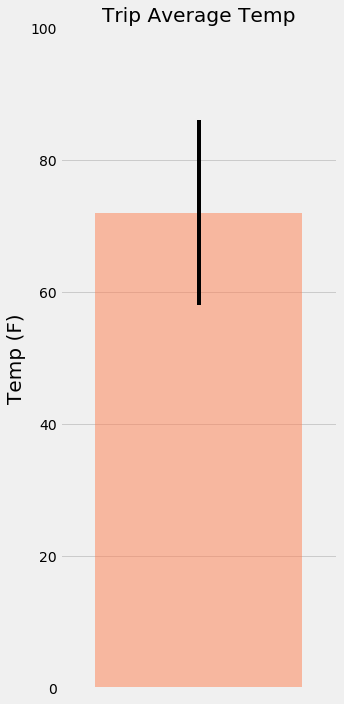

In [264]:



# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
error =  my_trip[0][2] -my_trip[0][0]
#print(style.available)
with plt.style.context(('fivethirtyeight')): 
    plt.figure(figsize=(5,10))
    plt.bar(x= (1.5),  height = avg_temp, yerr=error, align='center' , color = 'coral', alpha = .5,width =.75)
    ax1 = plt.axes()
    x_axis = ax1.axes.get_xaxis()
    x_axis.set_visible(False)
    plt.grid( zorder = 2)
    plt.xlim(1,2)
    plt.ylim(0,100)
    plt.ylabel( "Temp (F)", fontsize = 20)
    plt.title( "Trip Average Temp")
    plt.tight_layout()
    plt.savefig("Trip_AvgTemp_BS.png", dpi=192, bbox_inches='tight') 
    plt.show()

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



MEASUREMENT TABLE 
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}
    
 STATION TABLE 
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [322]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# EXAMPLE OF JOIN 

#  I CANT FIGURE OUT WHAT DATES YOU WANT HERE BUT YOU CAN SEE I CAN PULL ANY DATE INTO THIS QUERY
selection = [ Measurement.station,  Station.name, Measurement.prcp, Station.latitude, Station.longitude, Station.elevation ]
    join_1_ = session.query(*selection).filter(Measurement.station == Station.station).\
    filter(Measurement.date >='2017-02-28', Measurement.date <='2017-03-05' ).\
    order_by(Measurement.prcp.desc()).limit(10).all()
#print(join_1_)
grp = [ ids,name,prcp,lat,long,elv]
print('UGLY PRINT-----UGLY PRINT-----UGLY PRINT-----UGLY PRINT-----UGLY PRINT-----UGLY PRINT-----UGLY PRINT')
print()
print("Station ID   | Station Name  [ Precipitaion ] ( Latitude )| Longitude | Elevation"  )
for x in join_1_: 
         print( x[0], " | ",   x[1] ," [ ",  x[2]," ] (", x[3]," ) | ",x[4], " | ",x[5])
print()


print('PRETTY PRINT----------PRETTY PRINT----------PRETTY PRINT----------PRETTY PRINT----------PRETTY PRINT')
df4 = pd.DataFrame(join_1_, columns=['Station ID', 'Staion Name', 'Precipitaion', 'Latitude', 'Longitude', 'Elevation' ] )
df4.head(10)

UGLY PRINT-----UGLY PRINT-----UGLY PRINT-----UGLY PRINT-----UGLY PRINT-----UGLY PRINT-----UGLY PRINT

Station ID   | Station Name  [ Precipitaion ] ( Latitude )| Longitude | Elevation
USC00517948  |  PEARL CITY, HI US  [  2.4  ] ( 21.3934  ) |  -157.9751  |  11.9
USC00513117  |  KANEOHE 838.1, HI US  [  2.2  ] ( 21.4234  ) |  -157.8015  |  14.6
USC00519281  |  WAIHEE 837.5, HI US  [  2.12  ] ( 21.45167  ) |  -157.84888999999998  |  32.9
USC00516128  |  MANOA LYON ARBO 785.2, HI US  [  2.0  ] ( 21.3331  ) |  -157.8025  |  152.4
USC00519281  |  WAIHEE 837.5, HI US  [  1.88  ] ( 21.45167  ) |  -157.84888999999998  |  32.9
USC00519523  |  WAIMANALO EXPERIMENTAL FARM, HI US  [  1.48  ] ( 21.33556  ) |  -157.71139  |  19.5
USC00513117  |  KANEOHE 838.1, HI US  [  1.45  ] ( 21.4234  ) |  -157.8015  |  14.6
USC00519397  |  WAIKIKI 717.2, HI US  [  1.19  ] ( 21.2716  ) |  -157.8168  |  3.0
USC00514830  |  KUALOA RANCH HEADQUARTERS 886.9, HI US  [  1.12  ] ( 21.5213  ) |  -157.8374  |  7.0
USC00

,Station ID,Staion Name,Precipitaion,Latitude,Longitude,Elevation
0,USC00517948,"PEARL CITY, HI US",2.40,21.39340,-157.97510,11.9
1,USC00513117,"KANEOHE 838.1, HI US",2.20,21.42340,-157.80150,14.6
2,USC00519281,"WAIHEE 837.5, HI US",2.12,21.45167,-157.84889,32.9
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",2.00,21.33310,-157.80250,152.4
4,USC00519281,"WAIHEE 837.5, HI US",1.88,21.45167,-157.84889,32.9
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",1.48,21.33556,-157.71139,19.5
6,USC00513117,"KANEOHE 838.1, HI US",1.45,21.42340,-157.80150,14.6
7,USC00519397,"WAIKIKI 717.2, HI US",1.19,21.27160,-157.81680,3.0
8,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1.12,21.52130,-157.83740,7.0
9,USC00519397,"WAIKIKI 717.2, HI US",0.73,21.27160,-157.81680,3.0


## Optional Challenge Assignment

#      I     DID   NOT       DO   THE   OPTIONAL   ASSIGNMENT    BELOW


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
